<a href="https://colab.research.google.com/github/mimomaina/NDVI_crophealth_analysis/blob/main/NVDI_crophealth_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install geemap
!pip install geemap earthengine-api rasterio earthpy folium matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.1 MB/s eta 0:00:00


In [2]:
#authenticate and initialize Earth Engine
import ee
ee.Authenticate()
ee.Initialize(project='ee-mainaruth929')


In [3]:
import geemap
import rasterio
import earthpy
import folium

In [4]:
#area of interest
aoi = ee.Geometry.Rectangle([36.5, -1.5, 37.0, -1.0])
 #longitude - 36.5 to 37.0
 #latitude - -1.5 to -1.0



In [16]:
def compute_ndvi(aoi, start_date, end_date):
    # load data
    sentinel2 = ee.ImageCollection('COPERNICUS/S2_SR') \
        .filterBounds(aoi) \
        .filterDate(start_date, end_date) \
        .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))

    #select required bands only
    sentinel2 = sentinel2.select(['B8', 'B4'])

    # Compute median composite
    sentinel2 = sentinel2.median()

    nir = sentinel2.select('B8') #Near-red
    red = sentinel2.select('B4')

    # Calculate NDVI
    ndvi = nir.subtract(red).divide(nir.add(red)).rename('NDVI')

    return ndvi

In [17]:
#visualisation parameters
ndvi_params = {'min': -1, 'max': 1, 'palette': ['red', 'yellow', 'green']}

In [18]:
# January - March
start_date_q1 = '2024-01-01'
end_date_q1 = '2024-03-31'

#NDVI-Q1
ndvi_q1 = compute_ndvi(aoi, start_date_q1, end_date_q1)

Map_q1 = geemap.Map()
Map_q1.centerObject(aoi, 10)
Map_q1.addLayer(ndvi_q1, ndvi_params, 'NDVI Q1')
Map_q1

Map(center=[-1.2500039609349953, 36.749999999999815], controls=(WidgetControl(options=['position', 'transparen…

The colour green indicates presence of healthy vegatation.

Yellow represents moderately healthy/moderately stressed vegetation.



In [19]:
task_q1 = ee.batch.Export.image.toDrive(
    image=ndvi_q1,
    description='NDVI_Q1_2024',
    folder='NDVI_2024',
    region=aoi,
    scale=10,
    fileNamePrefix='NDVI_Q1_2024',
    fileFormat='GeoTIFF'
)
task_q1.start()

In [20]:
#April - June
start_date_q2 = '2024-04-01'
end_date_q2 = '2024-06-30'

#NDVI for Q2
ndvi_q2 = compute_ndvi(aoi, start_date_q2, end_date_q2)

Map_q2 = geemap.Map()
Map_q2.centerObject(aoi, 10)
Map_q2.addLayer(ndvi_q2, ndvi_params, 'NDVI Q2')
Map_q2

Map(center=[-1.2500039609349953, 36.749999999999815], controls=(WidgetControl(options=['position', 'transparen…

In [21]:
task_q2 = ee.batch.Export.image.toDrive(
    image=ndvi_q2,
    description='NDVI_Q2_2024',
    folder='NDVI_2024',
    region=aoi,
    scale=10,
    fileNamePrefix='NDVI_Q2_2024',
    fileFormat='GeoTIFF'
)
task_q2.start()

In [22]:
#July - September
start_date_q3 = '2024-07-01'
end_date_q3 = '2024-09-30'

ndvi_q3 = compute_ndvi(aoi, start_date_q3, end_date_q3)

Map_q3 = geemap.Map()
Map_q3.centerObject(aoi, 10)
Map_q3.addLayer(ndvi_q3, ndvi_params, 'NDVI Q3')
Map_q3

Map(center=[-1.2500039609349953, 36.749999999999815], controls=(WidgetControl(options=['position', 'transparen…

In [23]:
task_q3 = ee.batch.Export.image.toDrive(
    image=ndvi_q3,
    description='NDVI_Q3_2024',
    folder='NDVI_2024',
    region=aoi,
    scale=10,
    fileNamePrefix='NDVI_Q3_2024',
    fileFormat='GeoTIFF'
)
task_q3.start()

In [24]:
#October - December
start_date_q4 = '2024-10-01'
end_date_q4 = '2024-12-31'

ndvi_q4 = compute_ndvi(aoi, start_date_q4, end_date_q4)

Map_q4 = geemap.Map()
Map_q4.centerObject(aoi, 10)
Map_q4.addLayer(ndvi_q4, ndvi_params, 'NDVI Q4')
Map_q4

Map(center=[-1.2500039609349953, 36.749999999999815], controls=(WidgetControl(options=['position', 'transparen…

In [25]:
task_q4 = ee.batch.Export.image.toDrive(
    image=ndvi_q4,
    description='NDVI_Q4_2024',
    folder='NDVI_2024',
    region=aoi,
    scale=10,
    fileNamePrefix='NDVI_Q4_2024',
    fileFormat='GeoTIFF'
)
task_q4.start()

# Checking for uniqueness of output for the quarters

In [30]:
histogram = ndvi_q1.reduceRegion(
    reducer=ee.Reducer.histogram(maxBuckets=50),
    geometry=aoi,
    scale=10,
    maxPixels=1e9
).getInfo()
print(histogram)

{'NDVI': {'bucketMeans': [-0.36908054668486573, -0.32343661314226724, -0.28967449048584953, -0.2573135723648933, -0.23404792943169556, -0.20096220171551046, -0.16942850661631584, -0.13747268421323378, -0.10824586564882852, -0.07795320989232284, -0.04370569677583639, -0.01187333628215862, 0.019886659112669198, 0.04812363062563735, 0.0783455889709672, 0.10984912821012394, 0.14121051492912504, 0.17239511828023876, 0.20339773499416466, 0.23464785245085606, 0.2659033686253577, 0.29703760292374265, 0.3281471092113239, 0.3592822339684578, 0.3904843785881386, 0.42159712063332166, 0.45270016745400077, 0.4838229731732201, 0.5149716182712775, 0.5459082505368004, 0.5772059360878911, 0.6074825326131941, 0.6352508397369372, 0.664851115502205, 0.6912752899451969], 'bucketMin': -0.375, 'bucketWidth': 0.03125, 'histogram': [2, 2, 1, 9, 223, 265, 490, 1294, 4772.117647058823, 5682, 10578.70588235294, 41240.41176470588, 258479.73333333334, 714349.7607843137, 884687.1450980392, 1005820.0549019611, 1234660

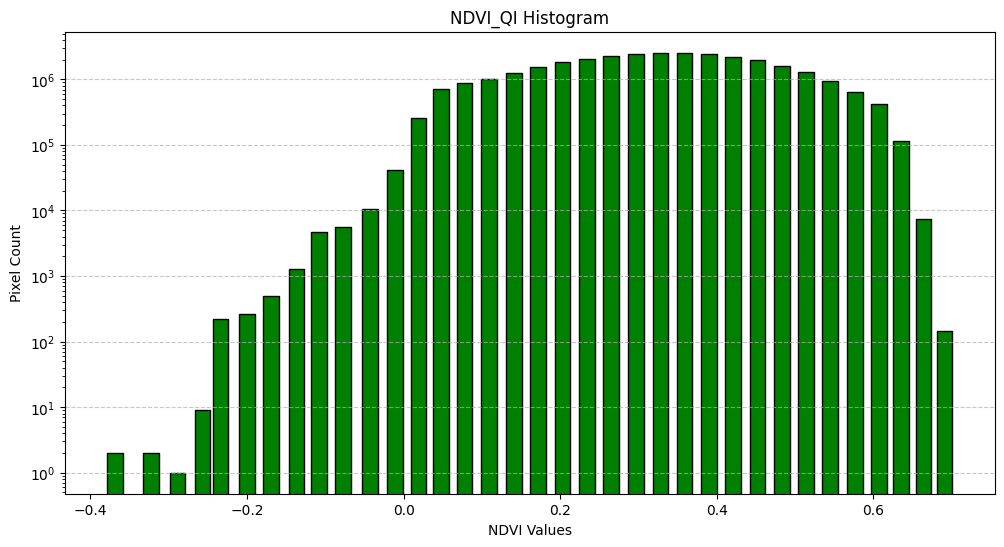

In [40]:
import matplotlib.pyplot as plt

# Extract histogram data
bucket_means = [-0.369, -0.323, -0.289, -0.257, -0.234, -0.200, -0.169, -0.137,
                -0.108, -0.077, -0.043, -0.011, 0.019, 0.048, 0.078, 0.109, 0.141,
                0.172, 0.203, 0.234, 0.265, 0.297, 0.328, 0.359, 0.390, 0.421,
                0.452, 0.483, 0.514, 0.545, 0.577, 0.607, 0.635, 0.664, 0.691]
histogram_counts = [2, 2, 1, 9, 223, 265, 490, 1294, 4772, 5682, 10578, 41240,
                    258479, 714349, 884687, 1005820, 1234660, 1556023, 1817896,
                    2012312, 2257405, 2473089, 2547901, 2513949, 2405265, 2227747,
                    1947469, 1611414, 1289709, 957003, 651531, 426773, 113822,
                    7513, 143]

plt.figure(figsize=(12, 6))
plt.bar(bucket_means, histogram_counts, width=0.02, color='green', edgecolor='black')
plt.xlabel('NDVI Values')
plt.ylabel('Pixel Count')
plt.title('NDVI_QI Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale('log')
plt.show()

The histogram peaks between 0.3 to 0.4, indicating that most pixels in your AOI have moderate to high vegetation health.

A significant number of pixels have an NDVI value greater than 0.4 indicating presence of healthy vegetation.

There also pixels with an NDVI value less than 0.2(near zero) indicating unhealthy vegetation/stress zone.

In [34]:
histogram = ndvi_q2.reduceRegion(
    reducer=ee.Reducer.histogram(maxBuckets=50),
    geometry=aoi,
    scale=10,
    maxPixels=1e9
).getInfo()
print(histogram)

{'NDVI': {'bucketMeans': [-0.46711864406779663, -0.421875, -0.3945193619864878, -0.35478315050002196, -0.328125, -0.297720563204924, -0.25982651456748806, -0.23219205975523827, -0.20126621256177332, -0.16788602545549572, -0.14107121574952267, -0.10977487144732302, -0.07725243285513479, -0.04361874331085978, -0.011992464322387535, 0.017967151491147935, 0.047209080995646226, 0.07838585687121155, 0.10962976274544499, 0.1408938560366179, 0.17227951227330807, 0.2036119463813205, 0.23497862857605104, 0.26623468974825176, 0.2974376342169056, 0.32856807810033234, 0.359670128021651, 0.3906627021061555, 0.4215816875337595, 0.4527603831612961, 0.48385122321842244, 0.5147425186835649, 0.5456098490525528, 0.5766817227365998, 0.6074573422843316, 0.6360800506005956, 0.6646698550308301, 0.6941444430572354], 'bucketMin': -0.46875, 'bucketWidth': 0.03125, 'histogram': [1, 0, 4, 2, 0, 7, 353, 1065, 2191.235294117647, 6772.117647058823, 11527.117647058823, 9184.35294117647, 12572.470588235294, 25035.94117

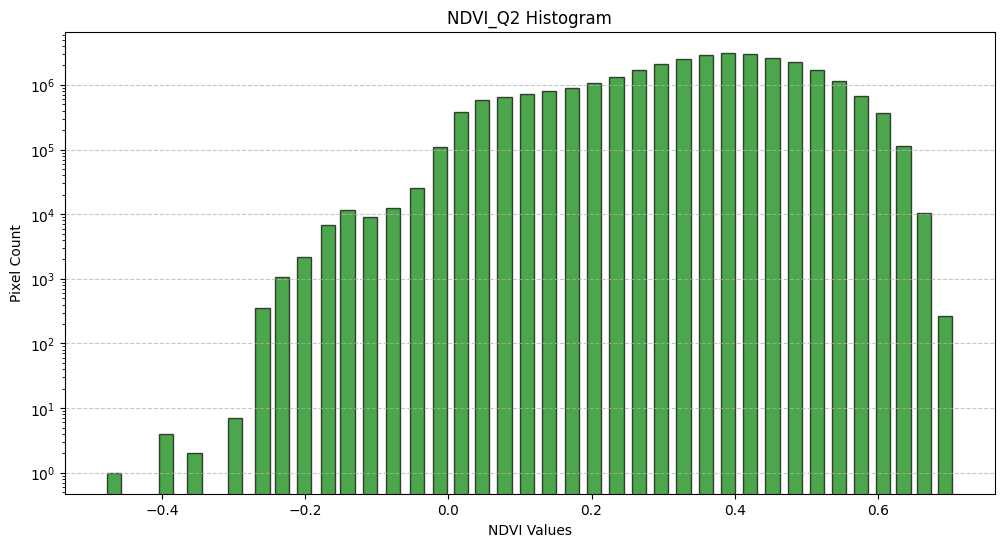

In [43]:
# Extract histogram data
bucket_means = [-0.46711864406779663, -0.421875, -0.3945193619864878, -0.35478315050002196, -0.328125,
                -0.297720563204924, -0.25982651456748806, -0.23219205975523827, -0.20126621256177332,
                -0.16788602545549572, -0.14107121574952267, -0.10977487144732302, -0.07725243285513479,
                -0.04361874331085978, -0.011992464322387535, 0.017967151491147935, 0.047209080995646226,
                0.07838585687121155, 0.10962976274544499, 0.1408938560366179, 0.17227951227330807,
                0.2036119463813205, 0.23497862857605104, 0.26623468974825176, 0.2974376342169056,
                0.32856807810033234, 0.359670128021651, 0.3906627021061555, 0.4215816875337595,
                0.4527603831612961, 0.48385122321842244, 0.5147425186835649, 0.5456098490525528,
                0.5766817227365998, 0.6074573422843316, 0.6360800506005956, 0.6646698550308301,
                0.6941444430572354]

histogram_counts = [1, 0, 4, 2, 0, 7, 353, 1065, 2191.235294117647, 6772.117647058823, 11527.117647058823,
                    9184.35294117647, 12572.470588235294, 25035.941176470587, 111423.23529411765,
                    380062.2470588235, 592239.1568627451, 647612.3921568627, 719579.3529411765,
                    797505.3098039213, 911079.7999999998, 1080121.1568627453, 1330451.0470588233,
                    1685814.3607843136, 2108868.1999999997, 2556044.568627451, 2952413.94117647,
                    3149687.4666666663, 2996400.458823529, 2630470.552941176, 2231858.349019608,
                    1722999.1490196076, 1143701.6509803922, 668150.2156862745, 371089.5450980392,
                    112583.16470588234, 10391, 265]

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(bucket_means, histogram_counts, width=0.02, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('NDVI Values')
plt.ylabel('Pixel Count')
plt.title('NDVI_Q2 Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale('log')
plt.show()

In [37]:
histogram = ndvi_q3.reduceRegion(
    reducer=ee.Reducer.histogram(maxBuckets=50),
    geometry=aoi,
    scale=10,
    maxPixels=1e9
).getInfo()
print(histogram)

{'NDVI': {'bucketMeans': [-0.25520045427391563, -0.24099900316330172, -0.22450342209315563, -0.21052808598452952, -0.1949235556376943, -0.17894423127976794, -0.1645395244799968, -0.14797628868941543, -0.1323952474900215, -0.1165964145662077, -0.1014078344252799, -0.08576358205253219, -0.06944220783014791, -0.0544087549959308, -0.03856752687731081, -0.022944508533647698, -0.006753099636874855, 0.0090924370952091, 0.024510655750911367, 0.03959609013199998, 0.05469703355598514, 0.07030231867325179, 0.08600940031241108, 0.10182888038758071, 0.11760270222611066, 0.13337811322535018, 0.14869921960756172, 0.16418965471275784, 0.17975792175975555, 0.19536039386218987, 0.210963144919955, 0.2265645571384274, 0.24215303859256562, 0.2577372072560009, 0.27333899835335634, 0.28896773957793237, 0.30460123349702956, 0.3202291488057769, 0.33585679350467235, 0.3514819868587817, 0.3671130922956003, 0.38273862204803893, 0.398374573489235, 0.41400506814947435, 0.4296300983213827, 0.44523880094577284, 0.460

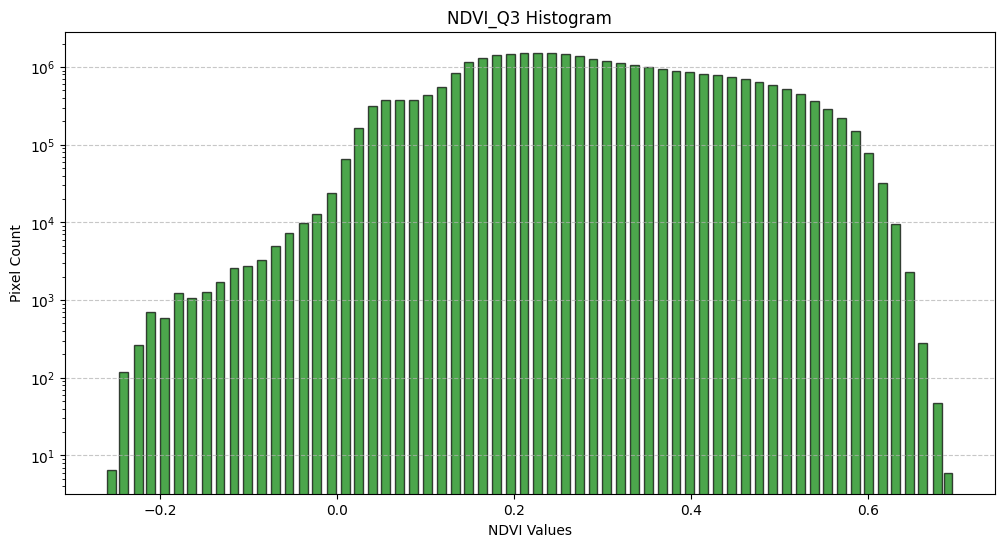

In [45]:
# Extract histogram data
bucket_means = [
    -0.25520045427391563, -0.24099900316330172, -0.22450342209315563, -0.21052808598452952,
    -0.1949235556376943, -0.17894423127976794, -0.1645395244799968, -0.14797628868941543,
    -0.1323952474900215, -0.1165964145662077, -0.1014078344252799, -0.08576358205253219,
    -0.06944220783014791, -0.0544087549959308, -0.03856752687731081, -0.022944508533647698,
    -0.006753099636874855, 0.0090924370952091, 0.024510655750911367, 0.03959609013199998,
    0.05469703355598514, 0.07030231867325179, 0.08600940031241108, 0.10182888038758071,
    0.11760270222611066, 0.13337811322535018, 0.14869921960756172, 0.16418965471275784,
    0.17975792175975555, 0.19536039386218987, 0.210963144919955, 0.2265645571384274,
    0.24215303859256562, 0.2577372072560009, 0.27333899835335634, 0.28896773957793237,
    0.30460123349702956, 0.3202291488057769, 0.33585679350467235, 0.3514819868587817,
    0.3671130922956003, 0.38273862204803893, 0.398374573489235, 0.41400506814947435,
    0.4296300983213827, 0.44523880094577284, 0.460841837856494, 0.47645067947653524,
    0.49203606252532467, 0.5076163824703475, 0.5232036404717142, 0.5387933853577789,
    0.5543345474825562, 0.5699058161112667, 0.5852856137637864, 0.6005256101963709,
    0.6157785407491426, 0.6310645107148399, 0.6463984518286592, 0.6613375089368078,
    0.6784406566484734, 0.6899555631350368
]

histogram_counts = [
    6.588235294117645, 119.3529411764706, 262, 698, 595, 1241, 1054, 1267.1176470588234,
    1697, 2605, 2740.1176470588234, 3244, 4930.117647058823, 7355.117647058823,
    9757.35294117647, 12638.588235294117, 24156.647058823528, 64743.8, 164397.38039215686,
    312780.5764705882, 373650.7921568628, 371347.58823529416, 379321.04705882346,
    430891.78823529417, 555286.2117647061, 833346.4352941175, 1141659.5882352944,
    1306850.0980392157, 1407947.2392156862, 1473617.6745098038, 1512133.0705882353,
    1525124.8745098042, 1515856.5803921565, 1467753.1450980392, 1377034.8078431373,
    1275061.8470588236, 1190947.945098039, 1120358.5215686273, 1056085.2666666666,
    998930.8784313726, 941920.2117647058, 895700.7843137254, 851993.7490196078,
    815330.7607843138, 779849.5647058823, 740181.2392156863, 696099.2549019608,
    642794.3333333334, 582602.7019607844, 517365.5137254902, 442436.63921568624,
    366729.70588235295, 288901.4705882353, 218034.23529411765, 148355.11764705883,
    77605.11764705883, 31911, 9604, 2280, 283, 48, 6
]

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(bucket_means, histogram_counts, width=0.01, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('NDVI Values')
plt.ylabel('Pixel Count')
plt.title('NDVI_Q3 Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale('log')
plt.show()

In [38]:
histogram = ndvi_q4.reduceRegion(
    reducer=ee.Reducer.histogram(maxBuckets=50),
    geometry=aoi,
    scale=10,
    maxPixels=1e9
).getInfo()
print(histogram)

{'NDVI': {'bucketMeans': [-0.3237768775319414, -0.28436846258023984, -0.26073572408628487, -0.23242577208225942, -0.20190436274285756, -0.17084591109244254, -0.1370670007904115, -0.11002209363838115, -0.07727460261355414, -0.0441432024882157, -0.011823073430857188, 0.01905581144206297, 0.04736353391162147, 0.07808127491155022, 0.11026452869778704, 0.141637268446484, 0.17291431440136526, 0.20380014821859488, 0.2347300626331482, 0.26568226392535543, 0.2967075727065678, 0.32774743231573833, 0.35903604855630544, 0.3904334749318975, 0.421844589748806, 0.4530653109272237, 0.4841957647248491, 0.5150922825846788, 0.5456772573270422, 0.5766318464668324, 0.6080052290526593, 0.6345852916718274, 0.6641224516336518, 0.6934262583146998], 'bucketMin': -0.34375, 'bucketWidth': 0.03125, 'histogram': [2, 7, 223, 838, 1207, 2021, 3142, 6347, 7751.176470588235, 12332.345098039215, 55828.705882352944, 264216.8078431373, 555672.7764705882, 572239.9411764705, 667323.172549019, 1000874.9686274508, 1490452.196

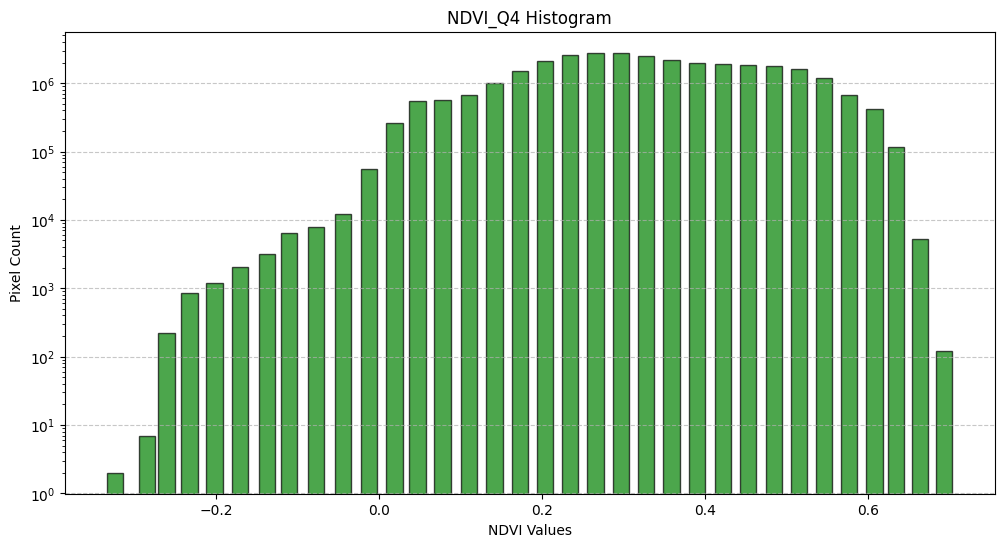

In [42]:
# Extract histogram data
bucket_means = [
    -0.3237768775319414, -0.28436846258023984, -0.26073572408628487, -0.23242577208225942,
    -0.20190436274285756, -0.17084591109244254, -0.1370670007904115, -0.11002209363838115,
    -0.07727460261355414, -0.0441432024882157, -0.011823073430857188, 0.01905581144206297,
    0.04736353391162147, 0.07808127491155022, 0.11026452869778704, 0.141637268446484,
    0.17291431440136526, 0.20380014821859488, 0.2347300626331482, 0.26568226392535543,
    0.2967075727065678, 0.32774743231573833, 0.35903604855630544, 0.3904334749318975,
    0.421844589748806, 0.4530653109272237, 0.4841957647248491, 0.5150922825846788,
    0.5456772573270422, 0.5766318464668324, 0.6080052290526593, 0.6345852916718274,
    0.6641224516336518, 0.6934262583146998
]

histogram_counts = [
    2, 7, 223, 838, 1207, 2021, 3142, 6347, 7751.176470588235, 12332.345098039215,
    55828.705882352944, 264216.8078431373, 555672.7764705882, 572239.9411764705,
    667323.172549019, 1000874.9686274508, 1490452.1960784306, 2101673.7607843126,
    2557379.6392156864, 2790207.2784313727, 2757612.341176471, 2477791.5843137256,
    2154109.909803922, 1957636.1019607848, 1882647.4078431372, 1861232.5960784317,
    1794319.141176471, 1606595.0509803924, 1180519.2745098039, 679616.3803921569,
    416645, 115602, 5339, 121
]

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(bucket_means, histogram_counts, width=0.02, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('NDVI Values')
plt.ylabel('Pixel Count')
plt.title('NDVI_Q4 Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale('log')
plt.show()

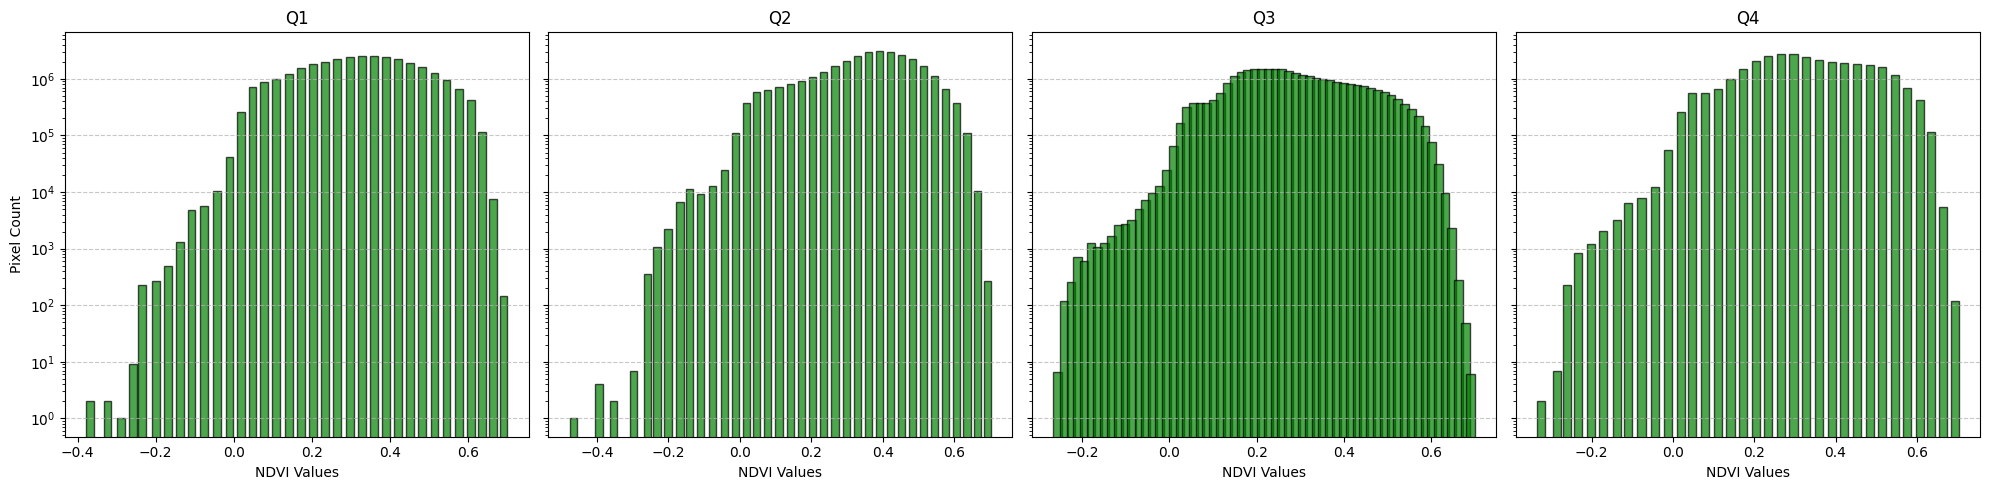

In [47]:
import matplotlib.pyplot as plt

# Define histogram data (replace these placeholders with your actual data)
histogram_data = [
    {
        "bucket_means": [-0.369, -0.323, -0.289, -0.257, -0.234, -0.200, -0.169, -0.137,
                -0.108, -0.077, -0.043, -0.011, 0.019, 0.048, 0.078, 0.109, 0.141,
                0.172, 0.203, 0.234, 0.265, 0.297, 0.328, 0.359, 0.390, 0.421,
                0.452, 0.483, 0.514, 0.545, 0.577, 0.607, 0.635, 0.664, 0.691],
        "histogram_counts": [2, 2, 1, 9, 223, 265, 490, 1294, 4772, 5682, 10578, 41240,
                    258479, 714349, 884687, 1005820, 1234660, 1556023, 1817896,
                    2012312, 2257405, 2473089, 2547901, 2513949, 2405265, 2227747,
                    1947469, 1611414, 1289709, 957003, 651531, 426773, 113822,
                    7513, 143],
        "title": "Q1"
    },
    {
        "bucket_means": [-0.46711864406779663, -0.421875, -0.3945193619864878, -0.35478315050002196, -0.328125,
                -0.297720563204924, -0.25982651456748806, -0.23219205975523827, -0.20126621256177332,
                -0.16788602545549572, -0.14107121574952267, -0.10977487144732302, -0.07725243285513479,
                -0.04361874331085978, -0.011992464322387535, 0.017967151491147935, 0.047209080995646226,
                0.07838585687121155, 0.10962976274544499, 0.1408938560366179, 0.17227951227330807,
                0.2036119463813205, 0.23497862857605104, 0.26623468974825176, 0.2974376342169056,
                0.32856807810033234, 0.359670128021651, 0.3906627021061555, 0.4215816875337595,
                0.4527603831612961, 0.48385122321842244, 0.5147425186835649, 0.5456098490525528,
                0.5766817227365998, 0.6074573422843316, 0.6360800506005956, 0.6646698550308301,
                0.6941444430572354],
        "histogram_counts": [1, 0, 4, 2, 0, 7, 353, 1065, 2191.235294117647, 6772.117647058823, 11527.117647058823,
                    9184.35294117647, 12572.470588235294, 25035.941176470587, 111423.23529411765,
                    380062.2470588235, 592239.1568627451, 647612.3921568627, 719579.3529411765,
                    797505.3098039213, 911079.7999999998, 1080121.1568627453, 1330451.0470588233,
                    1685814.3607843136, 2108868.1999999997, 2556044.568627451, 2952413.94117647,
                    3149687.4666666663, 2996400.458823529, 2630470.552941176, 2231858.349019608,
                    1722999.1490196076, 1143701.6509803922, 668150.2156862745, 371089.5450980392,
                    112583.16470588234, 10391, 265],
        "title": "Q2"
    },
    {
        "bucket_means": [-0.25520045427391563, -0.24099900316330172, -0.22450342209315563, -0.21052808598452952,
    -0.1949235556376943, -0.17894423127976794, -0.1645395244799968, -0.14797628868941543,
    -0.1323952474900215, -0.1165964145662077, -0.1014078344252799, -0.08576358205253219,
    -0.06944220783014791, -0.0544087549959308, -0.03856752687731081, -0.022944508533647698,
    -0.006753099636874855, 0.0090924370952091, 0.024510655750911367, 0.03959609013199998,
    0.05469703355598514, 0.07030231867325179, 0.08600940031241108, 0.10182888038758071,
    0.11760270222611066, 0.13337811322535018, 0.14869921960756172, 0.16418965471275784,
    0.17975792175975555, 0.19536039386218987, 0.210963144919955, 0.2265645571384274,
    0.24215303859256562, 0.2577372072560009, 0.27333899835335634, 0.28896773957793237,
    0.30460123349702956, 0.3202291488057769, 0.33585679350467235, 0.3514819868587817,
    0.3671130922956003, 0.38273862204803893, 0.398374573489235, 0.41400506814947435,
    0.4296300983213827, 0.44523880094577284, 0.460841837856494, 0.47645067947653524,
    0.49203606252532467, 0.5076163824703475, 0.5232036404717142, 0.5387933853577789,
    0.5543345474825562, 0.5699058161112667, 0.5852856137637864, 0.6005256101963709,
    0.6157785407491426, 0.6310645107148399, 0.6463984518286592, 0.6613375089368078,
    0.6784406566484734, 0.6899555631350368],
        "histogram_counts": [ 6.588235294117645, 119.3529411764706, 262, 698, 595, 1241, 1054, 1267.1176470588234,
    1697, 2605, 2740.1176470588234, 3244, 4930.117647058823, 7355.117647058823,
    9757.35294117647, 12638.588235294117, 24156.647058823528, 64743.8, 164397.38039215686,
    312780.5764705882, 373650.7921568628, 371347.58823529416, 379321.04705882346,
    430891.78823529417, 555286.2117647061, 833346.4352941175, 1141659.5882352944,
    1306850.0980392157, 1407947.2392156862, 1473617.6745098038, 1512133.0705882353,
    1525124.8745098042, 1515856.5803921565, 1467753.1450980392, 1377034.8078431373,
    1275061.8470588236, 1190947.945098039, 1120358.5215686273, 1056085.2666666666,
    998930.8784313726, 941920.2117647058, 895700.7843137254, 851993.7490196078,
    815330.7607843138, 779849.5647058823, 740181.2392156863, 696099.2549019608,
    642794.3333333334, 582602.7019607844, 517365.5137254902, 442436.63921568624,
    366729.70588235295, 288901.4705882353, 218034.23529411765, 148355.11764705883,
    77605.11764705883, 31911, 9604, 2280, 283, 48, 6],
        "title": "Q3"
    },
    {
        "bucket_means": [-0.3237768775319414, -0.28436846258023984, -0.26073572408628487, -0.23242577208225942,
    -0.20190436274285756, -0.17084591109244254, -0.1370670007904115, -0.11002209363838115,
    -0.07727460261355414, -0.0441432024882157, -0.011823073430857188, 0.01905581144206297,
    0.04736353391162147, 0.07808127491155022, 0.11026452869778704, 0.141637268446484,
    0.17291431440136526, 0.20380014821859488, 0.2347300626331482, 0.26568226392535543,
    0.2967075727065678, 0.32774743231573833, 0.35903604855630544, 0.3904334749318975,
    0.421844589748806, 0.4530653109272237, 0.4841957647248491, 0.5150922825846788,
    0.5456772573270422, 0.5766318464668324, 0.6080052290526593, 0.6345852916718274,
    0.6641224516336518, 0.6934262583146998],
        "histogram_counts": [2, 7, 223, 838, 1207, 2021, 3142, 6347, 7751.176470588235, 12332.345098039215,
    55828.705882352944, 264216.8078431373, 555672.7764705882, 572239.9411764705,
    667323.172549019, 1000874.9686274508, 1490452.1960784306, 2101673.7607843126,
    2557379.6392156864, 2790207.2784313727, 2757612.341176471, 2477791.5843137256,
    2154109.909803922, 1957636.1019607848, 1882647.4078431372, 1861232.5960784317,
    1794319.141176471, 1606595.0509803924, 1180519.2745098039, 679616.3803921569,
    416645, 115602, 5339, 121],
        "title": "Q4"
    }
]

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)


for i, ax in enumerate(axes):
    bucket_means = histogram_data[i]["bucket_means"]
    histogram_counts = histogram_data[i]["histogram_counts"]
    title = histogram_data[i]["title"]

    # Plot the histogram
    ax.bar(bucket_means, histogram_counts, width=0.02, color='green', edgecolor='black', alpha=0.7)
    ax.set_xlabel('NDVI Values')
    ax.set_ylabel('Pixel Count' if i == 0 else "")
    ax.set_title(title)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_yscale('log')

plt.tight_layout()
plt.show()

**Comparison Across Quarters**

**1. Q1**

The histogram shows a relatively smooth distribution with a peak around NDVI ~0.4–0.5.

There are fewer pixels with very low NDVI values (<0), suggesting minimal bare soil or water bodies.

**2. Q2**

Similar to Q1, but the peak is slightly shifted toward higher NDVI values (~0.4–0.6).

The overall distribution appears more spread out, indicating variability in vegetation health.

**3. Q3**
The peak is sharper and higher, centered around NDVI ~0.4–0.5.

There are significantly fewer pixels with very low NDVI values compared to other quarters, suggesting healthier vegetation overall.

**4. Q4**
The histogram shows a peak similar to Q1 and Q2, centered around NDVI ~0.4–0.6.

The distribution is smoother compared to Q3, with a gradual decline in pixel counts as NDVI increases.


**Insights**

1. Most pixels fall within the NDVI range of 0.2–0.6, indicating that the majority of the AOI has moderate to high vegetation health across all quarters.

 -The peak in Q3 suggests that this quarter had the densest and healthiest vegetation.

 -Q3 shows the least presence of low NDVI values, implying better coverage or less barren land during that period.

2. -Q3 might represent a growing season or a period with optimal conditions for vegetation growth.

 -Q1, Q2, and Q4 may represent periods with slightly less favorable conditions, leading to a broader distribution of NDVI values.
